In [1]:
from scipy.io import loadmat
import numpy as np
np.set_printoptions(formatter={'float': '{:0.5f}'.format})

import pandas as pd

# .mat 파일 로드
data = loadmat('pvLoadPriceData_test.mat')

# 데이터 추출 예시
# MATLAB 파일 내에 있는 변수 이름을 정확히 알아야 합니다. time, cloudyDay, clearDay, loadData, costData
time = data['time'].flatten()
solarData = data['clearDay'].flatten() * 10e3
loadData = data['loadData'][:, 2].flatten()
costData = data['costData'].flatten()

print("자료형:", type(time), "차원" , time.shape, )
print("자료형:", type(solarData), "차원" , solarData.shape, )
print("자료형:", type(loadData), "차원" , loadData.shape, )
print("자료형:", type(costData), "차원" , costData.shape, )

자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)


In [2]:
surplusData = (solarData - loadData).tolist()

In [3]:
print(surplusData)

[29784.59140397387, 21364.30849793949, 12064.57516019704, -8357.484395114763, -19321.931405035197, -9913.88665182545, -14166.833500387787, -9713.88665182545, -14366.833500387787, -10113.88665182545, -14166.833500387787, -217.21196014154702, -9713.88665182545, -14166.833500387787, -13966.833500387787, -17450.9338789979, -21187.248183831223, -23496.836811063462, -25900.76015687012, -29020.078617426858, -31475.85258890927, -31989.1424674929, -34081.00864935329, -34672.51153066615, -34384.71150760691, -28638.668976351262, -24355.44433307479, -18256.09797395306, -22661.69029516162, -33793.28169287613, -29171.932563272123, -31318.703302525224, -27654.65430681093, -24700.84597230493, -28578.338695182814, -32108.192871620064, -36511.00992132601, -31889.548553880544, -36223.389167313, -35290.5631140788, -33769.10174663333, -29337.036417432013, -24072.398478930234, -45853.2192835834, -44857.53018384692, -11963.362532176194, -8948.747681026609, -9491.716982853599, -12270.359918200178, -10865.0256

데이터 수: 228


18309.176439210674

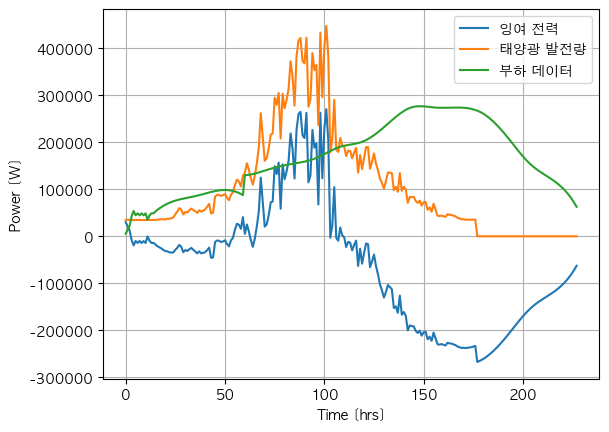

In [4]:
import matplotlib.pyplot as plt

print("데이터 수:", len(time))

plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

plt.subplot(1, 1, 1)
# Assuming Ppv, Pbatt, Pgrid, Pload are obtained from battSolarOptimize
plt.plot(range(len(time)), surplusData, range(len(time)), solarData, range(len(time)), loadData)
plt.grid(True)
plt.legend(['잉여 전력', '태양광 발전량', '부하 데이터', '기준선'])
plt.xlabel('Time [hrs]')
plt.ylabel('Power [W]')

totalCost = np.cumsum((loadData - solarData) * costData)
totalCost[-1] * 10e-6


18309.176439210674

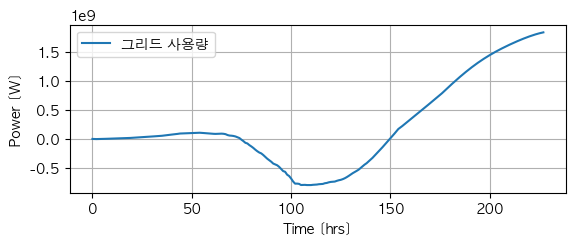

In [5]:
totalCost = np.cumsum((loadData - solarData) * costData)

plt.subplot(2, 1, 1)
# Assuming Ppv, Pbatt, Pgrid, Pload are obtained from battSolarOptimize
plt.plot(range(len(time)), totalCost)
plt.grid(True)
plt.legend(['그리드 사용량'])
plt.xlabel('Time [hrs]')
plt.ylabel('Power [W]')

totalCost[-1] * 10e-6